# En este notebook implementaremos el ELBOW-method

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

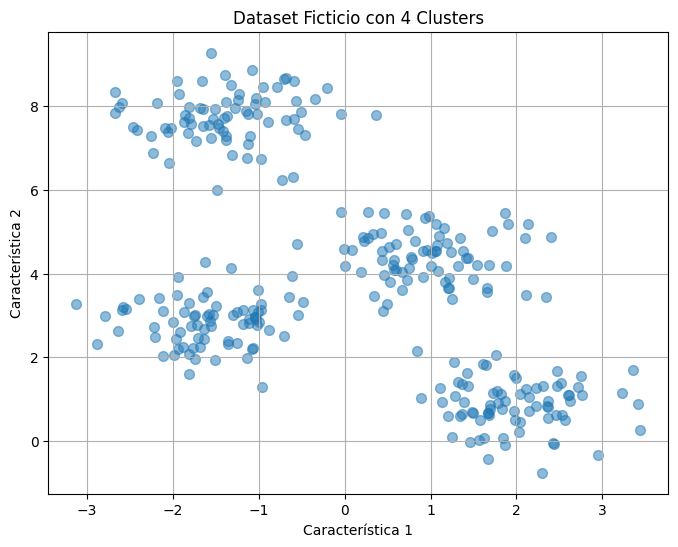

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Crear dataset ficticio con 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Plotear dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, alpha=0.5)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Dataset Ficticio con 4 Clusters')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

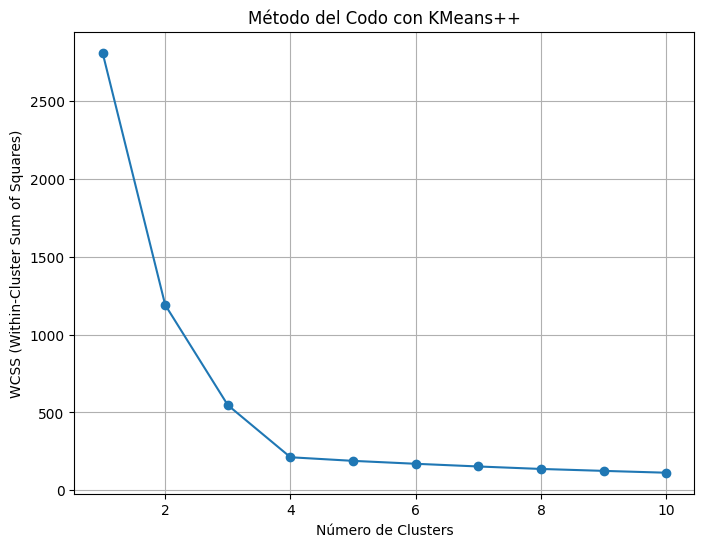

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Lista vacía donde guardaremos la pérdida en cada iteración
wcss = []

# Entrenamos KMeans con inicialización 'k-means++' y random_state=0
for i in range(1, 11):
    # Paso 1: Inicialización del modelo
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)

    # Paso 2: Entrenamiento del modelo
    kmeans.fit(X)

    # Paso 3: Añadir la WCSS a la lista 'wcss'
    wcss.append(kmeans.inertia_)

# Plotear la WCSS en función del número de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Método del Codo con KMeans++')
plt.grid(True)
plt.show()


# ¿Tiene sentido el elbow?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


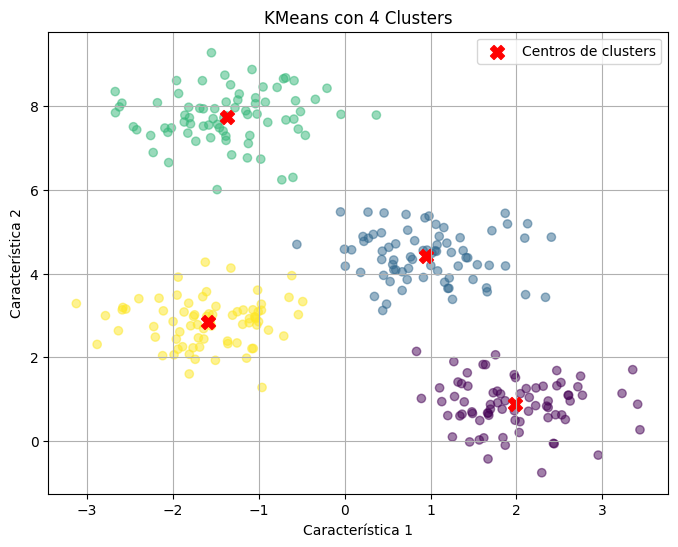

In [5]:
# Seleccionar el número óptimo de clusters (por ejemplo, el codo en la curva)
n_clusters = 4  # Aquí debes poner el número de clusters decidido

# Entrenar KMeans con el número de clusters seleccionado
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=0)
kmeans.fit(X)

# Plotear los puntos y los centros de los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centros de clusters')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'KMeans con {n_clusters} Clusters')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score
silhouette = silhouette_score(X, kmeans.labels_)

# Imprimir el Silhouette Score
print("Silhouette Score = {:.3f}".format(silhouette))


Silhouette Score = 0.682


# Tarea/Pregunta: ¿Cómo sería si queremos obtener el valor silhouette por muestra?

In [7]:
from sklearn.metrics import silhouette_samples

# Calcular el Silhouette Score para cada muestra
silhouette_samples = silhouette_samples(X, kmeans.labels_)

# Imprimir el Silhouette Score para cada muestra
print("Silhouette Score por muestra:")
for i, silhouette_sample in enumerate(silhouette_samples):
    print("Muestra {}: {:.3f}".format(i, silhouette_sample))


Silhouette Score por muestra:
Muestra 0: 0.231
Muestra 1: 0.778
Muestra 2: 0.718
Muestra 3: 0.781
Muestra 4: 0.467
Muestra 5: 0.648
Muestra 6: 0.641
Muestra 7: 0.742
Muestra 8: 0.641
Muestra 9: 0.714
Muestra 10: 0.771
Muestra 11: 0.705
Muestra 12: 0.755
Muestra 13: 0.656
Muestra 14: 0.708
Muestra 15: 0.593
Muestra 16: 0.758
Muestra 17: 0.767
Muestra 18: 0.644
Muestra 19: 0.662
Muestra 20: 0.701
Muestra 21: 0.760
Muestra 22: 0.702
Muestra 23: 0.757
Muestra 24: 0.765
Muestra 25: 0.245
Muestra 26: 0.790
Muestra 27: 0.707
Muestra 28: 0.652
Muestra 29: 0.501
Muestra 30: 0.699
Muestra 31: 0.751
Muestra 32: 0.646
Muestra 33: 0.603
Muestra 34: 0.808
Muestra 35: 0.718
Muestra 36: 0.766
Muestra 37: 0.717
Muestra 38: 0.738
Muestra 39: 0.793
Muestra 40: 0.546
Muestra 41: 0.717
Muestra 42: 0.417
Muestra 43: 0.717
Muestra 44: 0.762
Muestra 45: 0.673
Muestra 46: 0.805
Muestra 47: 0.765
Muestra 48: 0.798
Muestra 49: 0.697
Muestra 50: 0.671
Muestra 51: 0.782
Muestra 52: 0.749
Muestra 53: 0.795
Muestra 